In [70]:
!pip install pytrends

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc
import pytrends

In [143]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
#trending topics

from pytrends.request import TrendReq
pytrend = TrendReq()

In [176]:
kw_list = ['recipe']

In [183]:
pytrend.build_payload(kw_list=kw_list, timeframe='today 1-m', geo='GB-ENG', gprop='') #geo='GB-ENG' #'now 7-d'

In [184]:
# Interest by Region
#df = pytrend.interest_by_region()
#df.tail()

In [185]:
# Related Topics, returns a dictionary of dataframes: use to build network
topics = pytrend.related_topics()
topics_rising = topics['recipe']['rising']
topics_top = topics['recipe']['top']

In [186]:
topics_rising[['topic_title','value']]

,topic_title,value
0,Pancake,300
1,Savoury,200
2,Crêpe,160
3,American pancake,160
4,Hot cross bun,110
5,Gnocchi,70
6,Fruitcake,60
7,Fried rice,50
8,Batter,50
9,Cheddar sauce,40


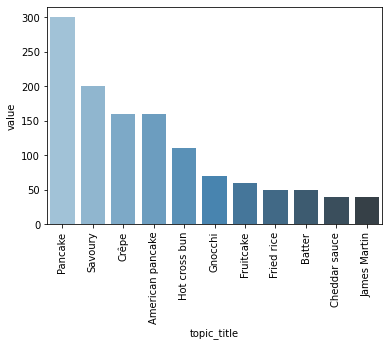

In [187]:
ax = sns.barplot(x="topic_title", y="value", data=topics_rising,
                 palette="Blues_d")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [191]:
# Get Google Keyword Suggestions: use to build network
keywords = pytrend.suggestions(keyword='recipe')
kw = pd.DataFrame(keywords)
kw = kw.drop('mid', axis=1)

In [192]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries['recipe']['rising'].head()

,query,value
0,pancake mixture recipe,14000
1,gluten free pancake recipe,9250
2,pancake batter recipe uk,5150
3,vegan pancake recipe,750
4,basic pancake recipe,550


In [140]:
#interest = pytrend.interest_over_time()

In [141]:
#interest.recipe.plot(kind='bar')